In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

IMU Plots

In [17]:
def plot_imu_data(filename, motion):
    file_data = pd.read_csv(filename, header=0).iloc[:, :-1]

    # get accumulated time in seconds from nanosecond timestamps
    time_vals = np.asarray(file_data[file_data.columns[-1]] - file_data[file_data.columns[-1]][0]) / 1e9

    # get sensor values
    acc_x_vals = np.asarray(file_data.iloc[:, 0])
    acc_y_vals = np.asarray(file_data.iloc[:, 1])
    angular_z_vals = np.asarray(file_data.iloc[:, 2])

    # plot results
    fig, ax1 = plt.subplots()
    plt.title(f"IMU Data for {motion} Motion: Accelerations and Velocity Over Time")
    ax1.plot(time_vals, acc_x_vals, label = "linear accel. x")
    ax1.plot(time_vals, acc_y_vals, label = "linear accel. y")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel(r'Acceleration ($m/s^2$)')
    plt.grid()

    ax2 = ax1.twinx()
    ax2.plot(time_vals, angular_z_vals, color='g', label = "ang. velocity z")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel(r'Velocity ($rad/s$)')

    # combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    plt.show()

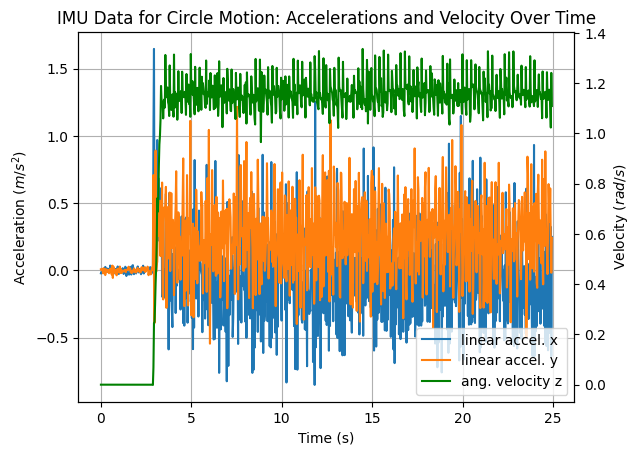

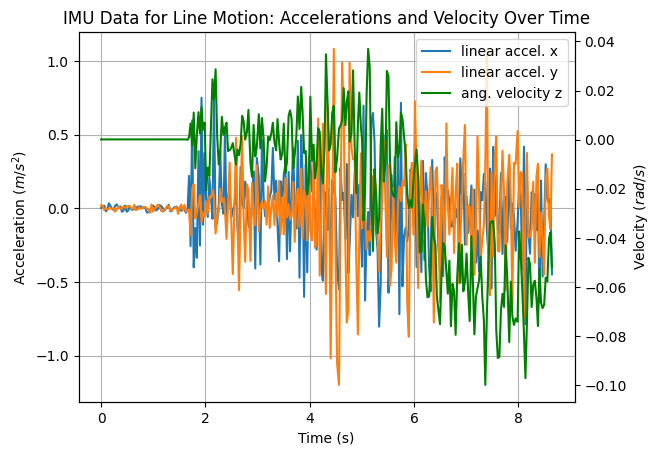

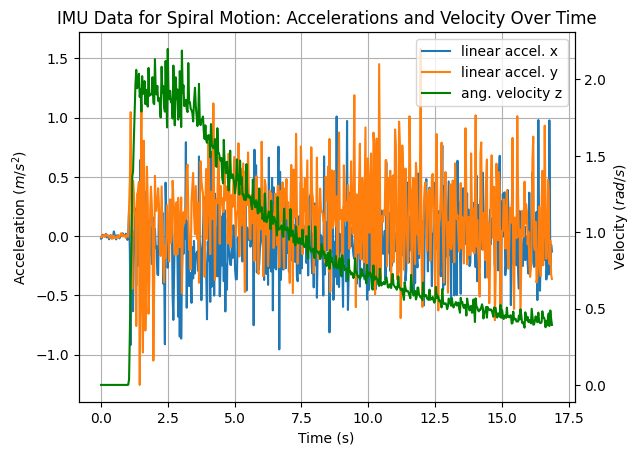

In [18]:
plot_imu_data("final_sensor_data/imu_content_circle.csv", "Circle")
plot_imu_data("final_sensor_data/imu_content_line.csv", "Line")
plot_imu_data("final_sensor_data/imu_content_spiral.csv", "Spiral")

Odometry Plots

In [19]:
def plot_odom_data(filename, motion):
    file_data = pd.read_csv(filename, header=0).iloc[:, :-1]

    # get accumulated time in seconds from nanosecond timestamps
    time_vals = np.asarray(file_data[file_data.columns[-1]] - file_data[file_data.columns[-1]][0]) / 1e9

    # get sensor values
    x_vals = np.asarray(file_data.iloc[:, 0])
    y_vals = np.asarray(file_data.iloc[:, 1])
    quat_x = np.asarray(file_data.iloc[:, 2])
    quat_y = np.asarray(file_data.iloc[:, 3])
    quat_z = np.asarray(file_data.iloc[:, 4])
    quat_w = np.asarray(file_data.iloc[:, 5])

    # compute theta from quaternion values
    theta_vals = np.arctan2(2 * (quat_w * quat_z + quat_x * quat_y), 1 - 2 * (np.power(quat_y, 2) + np.power(quat_z, 2)))
    
    # plot trajectory
    fig, ax1 = plt.subplots()
    plt.title(f"Odometry for {motion} Motion: 2D Trajectory")
    ax1.plot(x_vals, y_vals)
    ax1.set_xlabel("X Position (m)")
    ax1.set_ylabel("Y Position (m)")
    plt.grid()
    plt.show()

    # plot displacement over time
    fig, ax1 = plt.subplots()
    plt.title(f"Odometry for {motion} Motion: Position Over Time")
    ax1.plot(time_vals, x_vals, label = "x position")
    ax1.plot(time_vals, y_vals, label = "y position")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel(r'Linear Position ($m$)')
    plt.grid()

    ax2 = ax1.twinx()
    ax2.plot(time_vals, theta_vals, color='g', label = r'$\theta$ position')
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel(r'Angular Position ($rad$)')

    # combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    plt.tight_layout()
    plt.show()

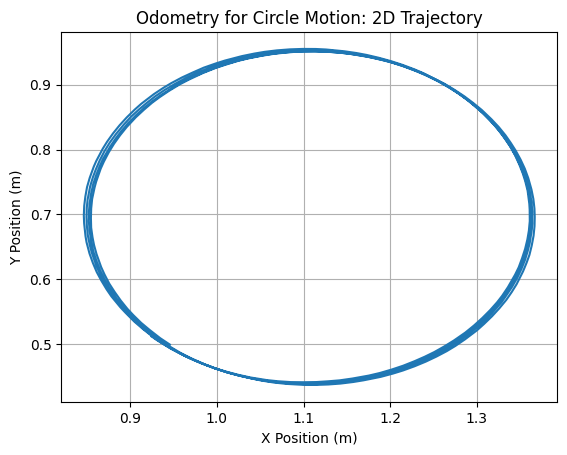

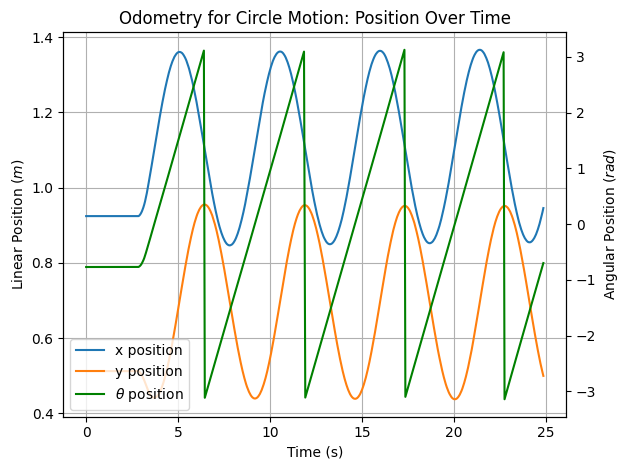

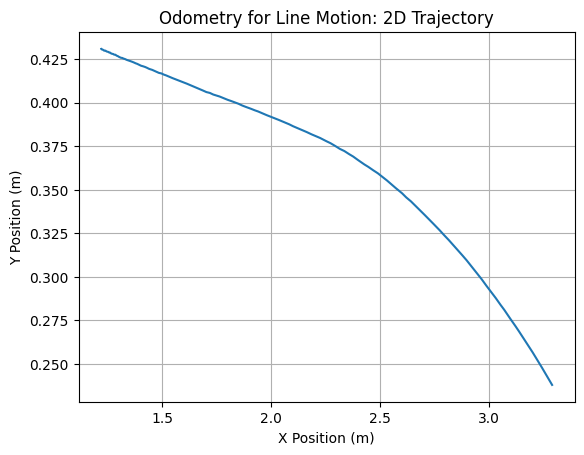

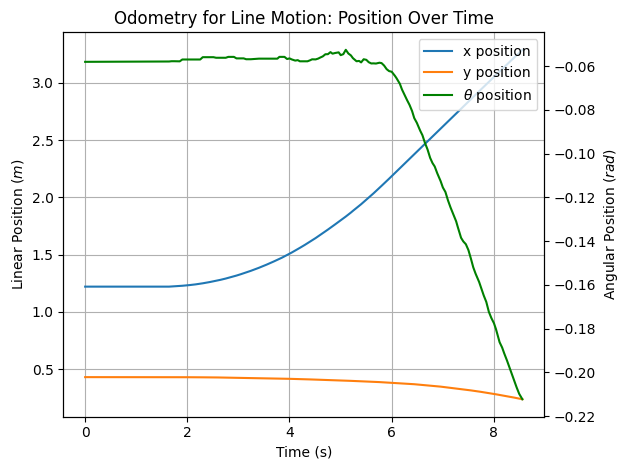

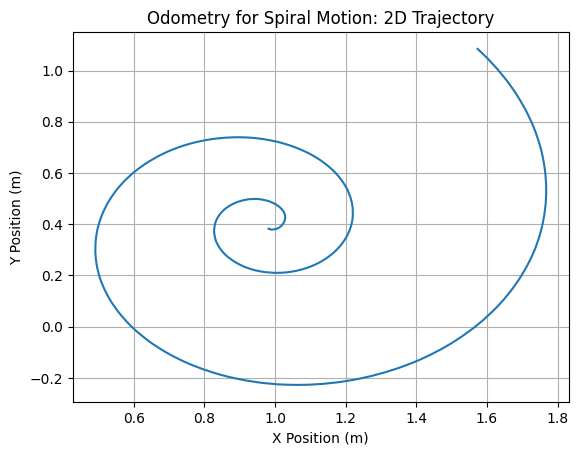

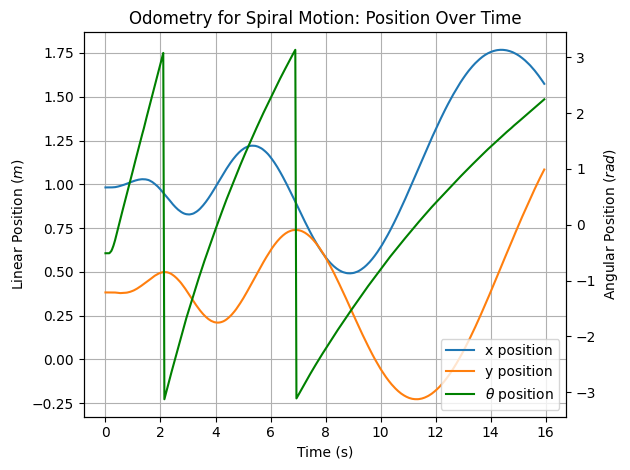

In [20]:
plot_odom_data("final_sensor_data/odom_content_circle.csv", "Circle")
plot_odom_data("final_sensor_data/odom_content_line.csv", "Line")
plot_odom_data("final_sensor_data/odom_content_spiral.csv", "Spiral")

Laser Scan Plots

In [21]:
def plot_laser_data(filename, motion):
    file_data = pd.read_csv(filename, skiprows=1).iloc[10, :-1]

    start_angle = file_data.iloc[0]
    angle_increment = file_data.iloc[-1]
    ranges = np.asarray([np.float64(str(val).replace('[', '').replace(']', '').strip()) for val in file_data.iloc[1:-1]])
    angles = np.asarray([start_angle + angle_increment * r for r in range(len(ranges))])

    # remove infinity measurements
    ignore_idxs = np.isinf(ranges)
    ranges_final = np.delete(ranges, ignore_idxs)
    angles_final = np.delete(angles, ignore_idxs)

    # convert to Cartesian coordinates
    x_vals = ranges_final * np.cos(angles_final)
    y_vals = ranges_final * np.sin(angles_final)

    # plot laser scan
    fig, ax1 = plt.subplots()
    plt.title(f"Laser Scan Data for {motion} Motion")
    ax1.scatter(x_vals, y_vals)
    ax1.set_xlabel("X Position (m)")
    ax1.set_ylabel("Y Position (m)")
    plt.grid()
    plt.show()

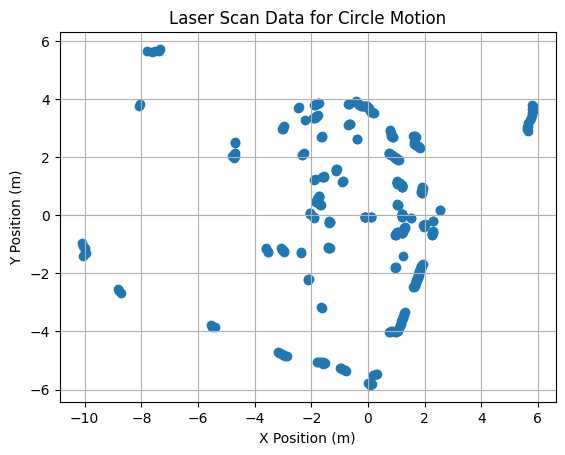

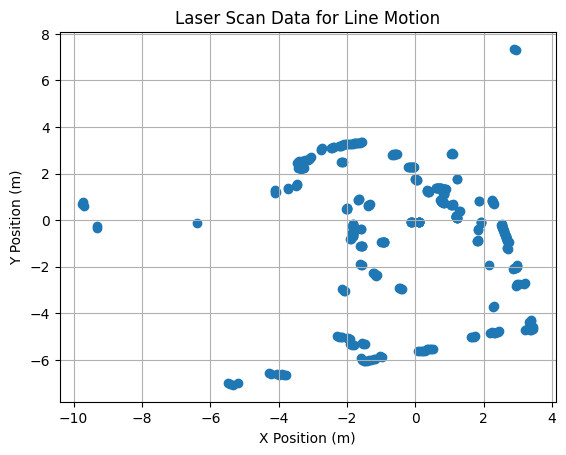

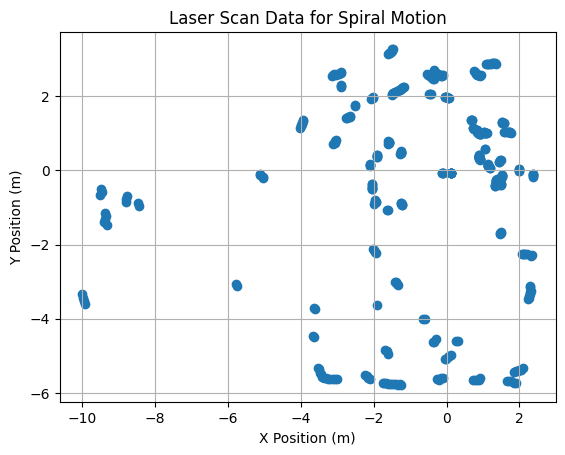

In [22]:
plot_laser_data("final_sensor_data/laser_content_circle.csv", "Circle")
plot_laser_data("final_sensor_data/laser_content_line.csv", "Line")
plot_laser_data("final_sensor_data/laser_content_spiral.csv", "Spiral")